In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")


In [ ]:
session=pd.read_csv("/content/drive/MyDrive/airbnb/sessions.csv")
print(session.shape)
session.head()

(10567737, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
train_user=pd.read_csv("/content/drive/MyDrive/airbnb/train_users_2.csv")
print(train_user.shape)
train_user.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
test_user=pd.read_csv("//content/drive/MyDrive/airbnb/test_users.csv")
print(test_user.shape)
test_user.head()

(62096, 15)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [ ]:
session.drop(['action_detail','device_type'],inplace=True,axis=1)
session.dropna(subset=['user_id','action'],inplace=True)
session.action_type=session.action_type.fillna('Other')
session.secs_elapsed=session.secs_elapsed.fillna(0)

In [ ]:
session.head(5)

,user_id,action,action_type,secs_elapsed
0,d1mm9tcy42,lookup,Other,319.0
1,d1mm9tcy42,search_results,click,67753.0
2,d1mm9tcy42,lookup,Other,301.0
3,d1mm9tcy42,search_results,click,22141.0
4,d1mm9tcy42,lookup,Other,435.0


In [ ]:
df_sess = session.groupby(['user_id']).agg({'action':'count','secs_elapsed':'sum'}).reset_index()
df_sess.head()

,user_id,action,secs_elapsed
0,00023iyk9l,39,738079.0
1,0010k6l0om,63,586543.0
2,001wyh0pz8,90,282965.0
3,0028jgx1x1,31,297010.0
4,002qnbzfs5,782,6463327.0


In [ ]:
df_sess.columns

Index(['user_id', 'action', 'secs_elapsed'], dtype='object')

In [ ]:
train_user_df=train_user.merge(df_sess, left_on=['id'],
                               right_on=['user_id'],how='left').drop(['user_id'],axis=1).reset_index(drop=True)
train_user_df.shape

(213451, 18)

In [ ]:
test_user_df=test_user.merge(df_sess,left_on=['id'],
                               right_on=['user_id'],how='left').drop(['user_id'],axis=1).reset_index(drop=True)
test_user_df.shape

(62096, 17)

In [ ]:
train_user_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,action,secs_elapsed
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,NaN,NaN
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,NaN,NaN
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,NaN,NaN
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,NaN,NaN
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,NaN,NaN


In [ ]:
# filling null columns of secs_elapsed, action and action_type columns with -1
train_user_df.secs_elapsed.fillna(-1,inplace=True)
train_user_df.action.fillna(-1,inplace=True)

train_user_df['secs_elapsed']=train_user_df['secs_elapsed'].astype('int64')
train_user_df['action']=train_user_df['action'].astype('int64')

In [ ]:
test_user_df.secs_elapsed.fillna(-1,inplace=True)
test_user_df.action.fillna(-1,inplace=True)

test_user_df['secs_elapsed']=test_user_df['secs_elapsed'].astype('int64')
test_user_df['action']=test_user_df['action'].astype('int64')

In [ ]:
train_user_df.isnull().sum()/train_user_df.shape[0] *100

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
action                      0.000000
secs_elapsed                0.000000
dtype: float64

## Data Cleaning

In [ ]:
# Cleaning

df =  train_user_df.dropna(axis = 0, how = 'any')
df.shape

(68171, 18)

In [ ]:
train_user_df.shape

(213451, 18)

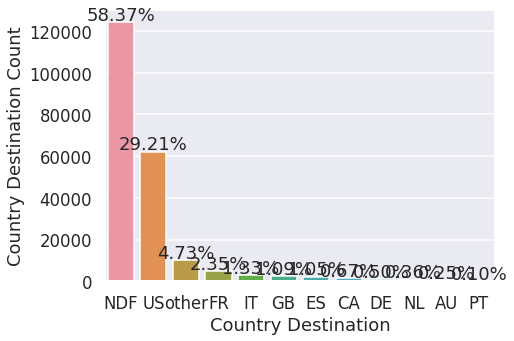

In [ ]:
# imbalanced dataset
import matplotlib.pyplot as plt
import seaborn as sn


order1 = train_user_df['country_destination'].value_counts()
order2 = order1.index
plt.figure(figsize=(7,5))
sn.countplot(train_user_df['country_destination'],order=order2)
plt.xlabel('Country Destination')
plt.ylabel('Country Destination Count')
for i in range(order1.shape[0]):
    count = order1[i]
    strg = '{:0.2f}%'.format(100*count/train_user_df.shape[0])
    plt.text(i,count+1000,strg,ha='center')

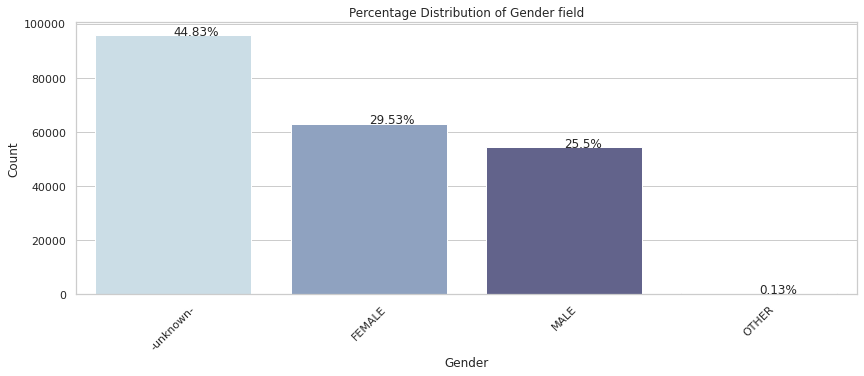

In [ ]:
plt.figure(figsize=(14,5))
sn.set(style = 'darkgrid')
sn.set_context("talk")
pal = sn.color_palette("ch:s=.25,rot=-.25", len(gender))
sn.set(style="whitegrid", color_codes=True)
gender = train_user['gender'].value_counts()
rank = gender.argsort().argsort() 
sn.countplot('gender', data = train_user,order = train_user['gender'].value_counts().index, palette=np.array(pal[::-1])[rank])

for i in range(gender.shape[0]):
    range_count = gender[i]
    per = round(((range_count*100)/train_user.shape[0]),2)
    percent = '{}%'.format(per)
    plt.text(i,range_count,percent)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Percentage Distribution of Gender field')
plt.show()

In [ ]:
# Handling null values and separating date, month and year 

# clubbing gender values having unknown and other 
train_user_df.gender.replace('-unknown-', 'OTHER', inplace=True)

# filling null age values with median = 34
train_user_df['age'].fillna(34,inplace=True)

train_user_df['timestamp_first_active']=train_user_df['timestamp_first_active'].apply(lambda s:datetime(year=int(str(s)[0:4]), month=int(str(s)[4:6]), 
                                                                                day=int(str(s)[6:8])).strftime('%Y-%m-%d'))

train_user_df['timestamp_first_active']=train_user_df['timestamp_first_active'].astype('datetime64[ns]')
train_user_df['age']=train_user_df['age'].astype('int64')
train_user_df['date_account_created']=train_user_df['date_account_created'].astype('datetime64[ns]')

train_user_df['dac_year']=train_user_df['date_account_created'].dt.year
train_user_df['dac_month']=train_user_df['date_account_created'].dt.month
train_user_df['dac_day']=train_user_df['date_account_created'].dt.day

train_user_df['tfa_year']=train_user_df['timestamp_first_active'].dt.year
train_user_df['tfa_month']=train_user_df['timestamp_first_active'].dt.month
train_user_df['tfa_day']=train_user_df['timestamp_first_active'].dt.day


# clubbing categories
train_user_df.signup_app.replace(['iOS','Android'],'SmartDevice',inplace=True)
        
train_user_df.drop(['date_first_booking','date_account_created','timestamp_first_active','first_device_type','first_browser'],axis=1,inplace=True)


In [ ]:
#NULL test data
test_user_df.gender.replace('-unknown-', 'OTHER', inplace=True)
test_user_df['age'].fillna(-1,inplace=True)

test_user_df['timestamp_first_active']=test_user_df['timestamp_first_active'].apply(lambda s:datetime(year=int(str(s)[0:4]), month=int(str(s)[4:6]), 
                                                                                day=int(str(s)[6:8])).strftime('%Y-%m-%d'))

test_user_df['timestamp_first_active']=test_user_df['timestamp_first_active'].astype('datetime64[ns]')
test_user_df['age']=test_user_df['age'].astype('int64')
test_user_df['date_account_created']=test_user_df['date_account_created'].astype('datetime64[ns]')

test_user_df['dac_year']=test_user_df['date_account_created'].dt.year
test_user_df['dac_month']=test_user_df['date_account_created'].dt.month
test_user_df['dac_day']=test_user_df['date_account_created'].dt.day

test_user_df['tfa_year']=test_user_df['timestamp_first_active'].dt.year
test_user_df['tfa_month']=test_user_df['timestamp_first_active'].dt.month
test_user_df['tfa_day']=test_user_df['timestamp_first_active'].dt.day


test_user_df.signup_app.replace(['iOS','Android'],'SmartDevice',inplace=True)
      
test_user_df.drop(['date_first_booking','date_account_created','timestamp_first_active','first_device_type','first_browser'],axis=1,inplace=True)


In [ ]:
train_user_df.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,country_destination,action,secs_elapsed,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,gxn3p5htnn,OTHER,34,facebook,0,en,direct,direct,untracked,Web,NDF,-1,-1,2010,6,28,2009,3,19
1,820tgsjxq7,MALE,38,facebook,0,en,seo,google,untracked,Web,NDF,-1,-1,2011,5,25,2009,5,23
2,4ft3gnwmtx,FEMALE,56,basic,3,en,direct,direct,untracked,Web,US,-1,-1,2010,9,28,2009,6,9
3,bjjt8pjhuk,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,other,-1,-1,2011,12,5,2009,10,31
4,87mebub9p4,OTHER,41,basic,0,en,direct,direct,untracked,Web,US,-1,-1,2010,9,14,2009,12,8


In [ ]:
train_user_df.info()

# Age imputation

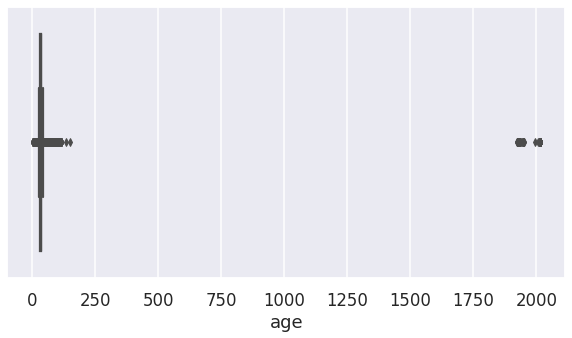

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sn.set(style='darkgrid')
sn.set_context('talk')
sn.boxplot(train_user_df['age'].dropna())
plt.show()

In [ ]:
train_user_df.drop(train_user_df[train_user_df['age'] < 15].index, inplace = True)
train_user_df.drop(train_user_df[train_user_df['age'] > 110].index, inplace = True)

In [ ]:
test_user_df.drop(test_user_df[test_user_df['age'] < 15].index, inplace = True)
test_user_df.drop(test_user_df[test_user_df['age'] > 110].index, inplace = True)

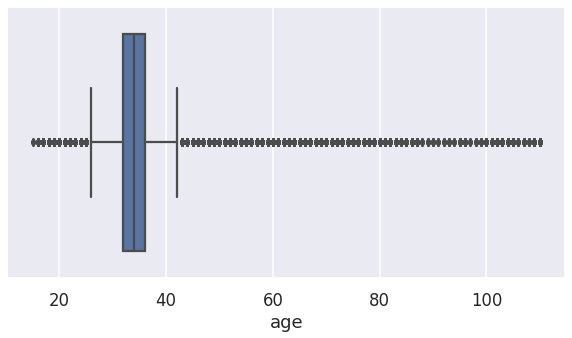

In [ ]:
# Removed outlier graph

plt.figure(figsize=(10,5))
sn.set(style='darkgrid')
sn.set_context('talk')
sn.boxplot(train_user_df['age'].dropna())
plt.show()

In [ ]:
train_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211049 entries, 0 to 213450
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       211049 non-null  object
 1   gender                   211049 non-null  object
 2   age                      211049 non-null  int64 
 3   signup_method            211049 non-null  object
 4   signup_flow              211049 non-null  int64 
 5   language                 211049 non-null  object
 6   affiliate_channel        211049 non-null  object
 7   affiliate_provider       211049 non-null  object
 8   first_affiliate_tracked  205053 non-null  object
 9   signup_app               211049 non-null  object
 10  country_destination      211049 non-null  object
 11  action                   211049 non-null  int64 
 12  secs_elapsed             211049 non-null  int64 
 13  dac_year                 211049 non-null  int64 
 14  dac_month           

# *Skewness in age*

In [ ]:
train_user_df['age'].skew(skipna = True)

2.993378756627732

(array([ 10778.,  50665., 121641.,  14541.,   8594.,   3563.,    871.,
           198.,    198.,   1544.]),
 array([ 15. ,  24.5,  34. ,  43.5,  53. ,  62.5,  72. ,  81.5,  91. ,
        100.5, 110. ]),
 <a list of 10 Patch objects>)

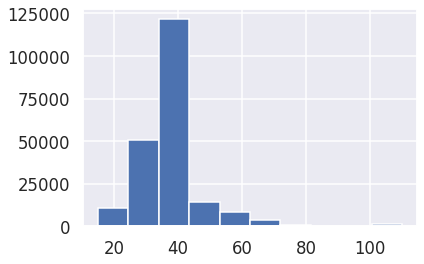

In [ ]:
import matplotlib.pyplot as plt


plt.hist(train_user_df['age'])

In [ ]:
import math

d  = train_user_df['age'].map(lambda x: math.log(x))
df_age = pd.DataFrame(data=d,columns=['age'])

train_user_df['age'] = df_age['age']

In [ ]:
# repeating same for test data

d  = test_user_df['age'].map(lambda x: math.log(x))
df_age = pd.DataFrame(data=d,columns=['age'])

test_user_df['age'] = df_age['age']

In [ ]:
df_age.skew(skipna = True)

age    0.77868
dtype: float64

(array([ 183., 2696., 7520., 9144., 5877., 3851., 2402., 1036.,  124.,
         336.]),
 array([2.7080502 , 2.90729322, 3.10653623, 3.30577925, 3.50502227,
        3.70426528, 3.9035083 , 4.10275132, 4.30199433, 4.50123735,
        4.70048037]),
 <a list of 10 Patch objects>)

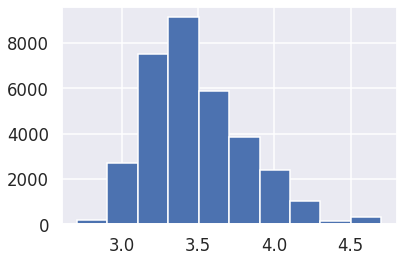

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df_age['age'])

# correlation matrix:

In [ ]:
temp = train_user_df.corr()
temp

,age,signup_flow,action,secs_elapsed,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
age,1.000000,-0.069755,-0.042560,-0.023904,-0.073519,0.014239,-0.004362,-0.073746,0.014166,-0.004395
signup_flow,-0.069755,1.000000,0.097579,0.037430,0.195362,-0.039079,0.014775,0.195189,-0.038980,0.014757
action,-0.042560,0.097579,1.000000,0.798734,0.361237,-0.220130,-0.001118,0.361257,-0.220135,-0.001113
secs_elapsed,-0.023904,0.037430,0.798734,1.000000,0.405354,-0.257169,0.001590,0.405377,-0.257175,0.001596
dac_year,-0.073519,0.195362,0.361237,0.405354,1.000000,-0.437238,0.003145,0.999321,-0.436864,0.003165
dac_month,0.014239,-0.039079,-0.220130,-0.257169,-0.437238,1.000000,-0.012992,-0.436736,0.999261,-0.012920
dac_day,-0.004362,0.014775,-0.001118,0.001590,0.003145,-0.012992,1.000000,0.003042,-0.013002,0.999266
tfa_year,-0.073746,0.195189,0.361257,0.405377,0.999321,-0.436736,0.003042,1.000000,-0.436822,0.003160
tfa_month,0.014166,-0.038980,-0.220135,-0.257175,-0.436864,0.999261,-0.013002,-0.436822,1.000000,-0.013018
tfa_day,-0.004395,0.014757,-0.001113,0.001596,0.003165,-0.012920,0.999266,0.003160,-0.013018,1.000000


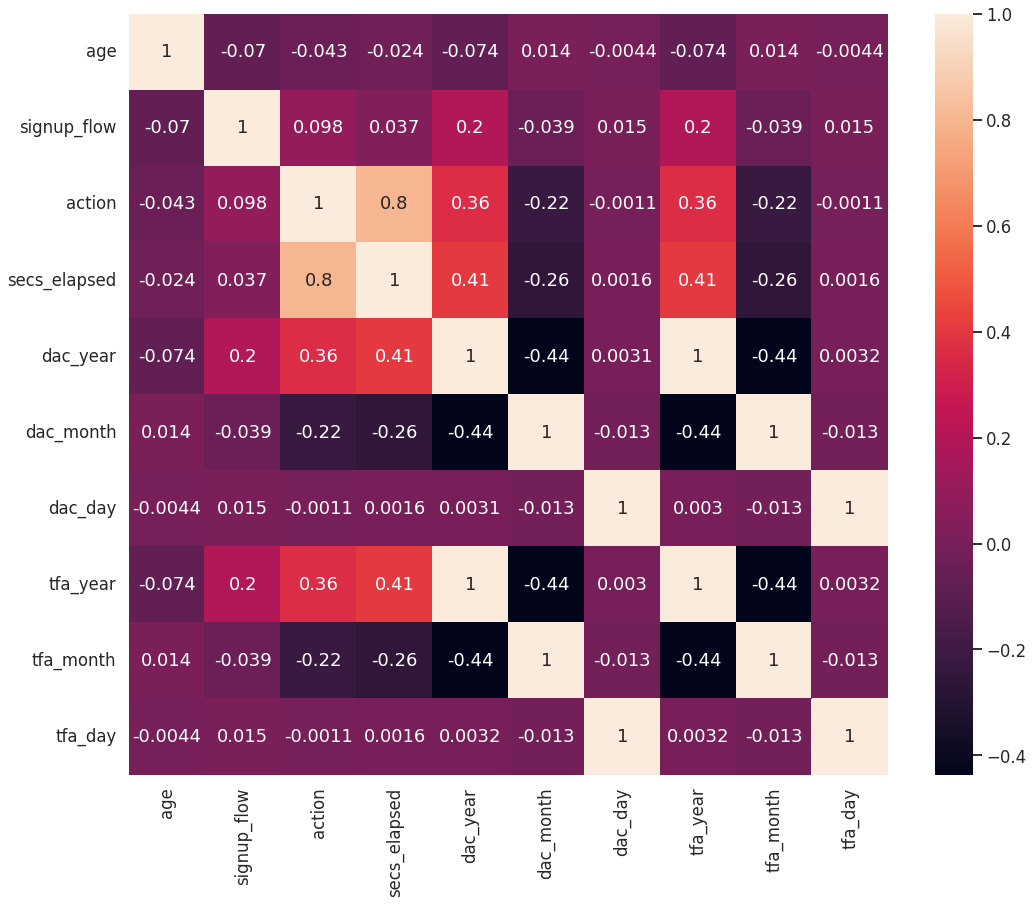

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 14))
svm = sn.heatmap(train_user_df.corr(), annot=True)

figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=1000)

In [ ]:
# removing timestamp first active

train_user_df.drop(['tfa_year','tfa_month','tfa_day'], axis = 1, inplace = True)

In [ ]:
# removing timestamp first active

test_user_df.drop(['tfa_year','tfa_month','tfa_day'], axis = 1, inplace = True)

In [ ]:
train_user_df.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,country_destination,action,secs_elapsed,dac_year,dac_month,dac_day
0,gxn3p5htnn,OTHER,3.526361,facebook,0,en,direct,direct,untracked,Web,NDF,-1,-1,2010,6,28
1,820tgsjxq7,MALE,3.637586,facebook,0,en,seo,google,untracked,Web,NDF,-1,-1,2011,5,25
2,4ft3gnwmtx,FEMALE,4.025352,basic,3,en,direct,direct,untracked,Web,US,-1,-1,2010,9,28
3,bjjt8pjhuk,FEMALE,3.737670,facebook,0,en,direct,direct,untracked,Web,other,-1,-1,2011,12,5
4,87mebub9p4,OTHER,3.713572,basic,0,en,direct,direct,untracked,Web,US,-1,-1,2010,9,14


## Test train split

In [ ]:
train_user_df.describe()

,age,signup_flow,action,secs_elapsed,dac_year,dac_month,dac_day
count,212593.000000,212593.000000,212593.000000,2.125930e+05,212593.000000,212593.000000,212593.000000
mean,3.550356,3.273744,25.089076,5.025037e+05,2013.026134,6.022066,15.869549
std,0.243856,7.645469,75.054541,1.288297e+06,0.937109,3.236826,8.740251
min,2.708050,0.000000,-1.000000,-1.000000e+00,2010.000000,1.000000,1.000000
25%,3.465736,0.000000,-1.000000,-1.000000e+00,2012.000000,3.000000,8.000000
50%,3.526361,0.000000,-1.000000,-1.000000e+00,2013.000000,6.000000,16.000000
75%,3.583519,0.000000,15.000000,2.866810e+05,2014.000000,9.000000,23.000000
max,4.700480,25.000000,2643.000000,2.927072e+07,2014.000000,12.000000,31.000000


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# encoding

temp_train = train_user_df.drop(['country_destination','id'], axis = 1)
temp_y = train_user_df['country_destination']

cato = temp_train.select_dtypes(include=['object']).copy()
onehot = pd.get_dummies(cato,columns = cato.columns)
# print(onehot.shape)

temp_train = temp_train.drop(cato.columns,axis=1)
temp_train = pd.concat([temp_train, onehot],axis=1)



In [ ]:
from sklearn.model_selection import train_test_split

x = train_user_df.drop(['country_destination','id'],axis = 1)
y = train_user_df.country_destination

train_x, test_x, train_y, test_y = train_test_split( temp_train , temp_y, test_size=0.2, random_state=1)

In [ ]:
test_x.shape, train_x.shape, test_y.shape, train_y.shape

((59527, 74), (170074, 74), (59527,), (170074,))

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_x)

# Apply transform to both the training set and the test set.
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


## PCA

In [ ]:
# PCA

pca = PCA(.95)
pca.fit(train_x)
X_train_pca = pca.transform(train_x)
X_test_pca = pca.transform(test_x)

# print(pd.DataFrame(pca.components_,columns= X_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10', 'PC-11', 'PC-12']))
comp_check = pca.explained_variance_ratio_
num_comps = comp_check.shape[0]
print("Using components, we can explain {}% of the variability in the original data.".format(comp_check.sum()))



# pca variance chart
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt = px.area(
  x=range(1, exp_var_cumul.shape[0] + 1),
  y=exp_var_cumul,
  labels={"x": "# Components", "y": "Explained Variance"}
)

Using components, we can explain 0.9527827426750032% of the variability in the original data.


In [ ]:
plt.show()

## Modelling

In [ ]:
# Encoding target variable

le = LabelEncoder()
train_y = le.fit_transform(train_y)
 

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [200, 400, 600]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(random_grid)

{'n_estimators': [200, 400, 600], 'min_samples_split': [2], 'min_samples_leaf': [1]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'f1_weighted', param_distributions = random_grid, cv = 2, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_pca, train_y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 400, 600]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [ ]:
rf_random.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

In [ ]:
pred_y = rf_random.best_estimator_.predict(X_test_pca)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,recall_score, precision_score

              precision    recall  f1-score   support

          AU       0.76      0.34      0.47       125
          CA       0.69      0.25      0.37       411
          DE       0.67      0.21      0.32       295
          ES       0.71      0.25      0.36       620
          FR       0.72      0.23      0.35      1430
          GB       0.67      0.25      0.36       642
          IT       0.72      0.25      0.37       778
         NDF       0.73      0.86      0.79     34772
          NL       0.78      0.21      0.33       226
          PT       0.75      0.26      0.39        68
          US       0.59      0.55      0.57     17379
       other       0.68      0.26      0.38      2781

    accuracy                           0.69     59527
   macro avg       0.71      0.33      0.42     59527
weighted avg       0.69      0.69      0.68     59527



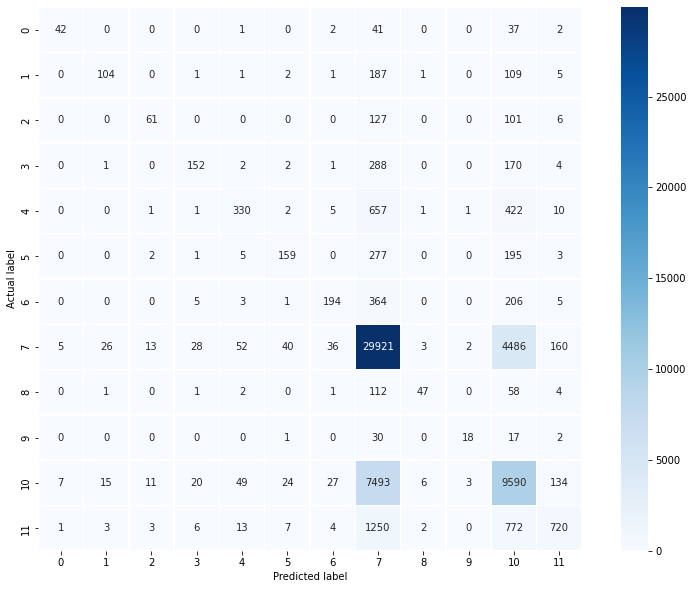



Accuracy score for random forest:  0.6944411779528618
0.6750806792567877


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

print(classification_report(test_y, le.inverse_transform(pred_y)))
cm = confusion_matrix(test_y, le.inverse_transform(pred_y))


plt.figure(figsize=(14,10))
sn = sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
figure = sn.get_figure()
# figure.savefig('cm_rf.png', dpi=1000)

print('\n\nAccuracy score for random forest: ', accuracy_score(test_y, le.inverse_transform(pred_y)))
print(f1_score(test_y, le.inverse_transform(pred_y),average = "weighted"))

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


In [ ]:
# ridge algorithm without resampling

from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold

alpha = [0.1, 0.3, 0.6, 1]

grid = dict(alpha=alpha)

model = RidgeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_pca, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.537204 using {'alpha': 1}
0.537204 (0.003125) with: {'alpha': 0.1}
0.537204 (0.003125) with: {'alpha': 0.3}
0.537204 (0.003125) with: {'alpha': 0.6}
0.537204 (0.003125) with: {'alpha': 1}


In [ ]:
rc = RidgeClassifier(alpha = 1)
rc.fit(X_train_pca, train_y)

ypred = rc.predict(X_test_pca)

RidgeClassifier(alpha=1)

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       125
          CA       0.00      0.00      0.00       411
          DE       0.00      0.00      0.00       295
          ES       0.00      0.00      0.00       620
          FR       0.00      0.00      0.00      1430
          GB       0.00      0.00      0.00       642
          IT       0.00      0.00      0.00       778
         NDF       0.64      0.87      0.74     34772
          NL       0.00      0.00      0.00       226
          PT       0.00      0.00      0.00        68
          US       0.45      0.31      0.36     17379
       other       0.00      0.00      0.00      2781

    accuracy                           0.60     59527
   macro avg       0.09      0.10      0.09     59527
weighted avg       0.50      0.60      0.54     59527



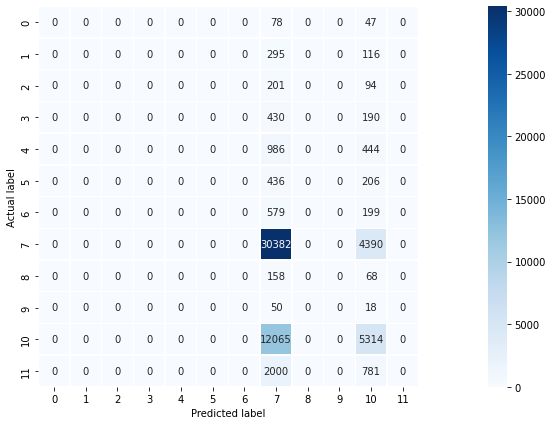

0.599660658188721
0.5366874641016983


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,recall_score, precision_score

print(classification_report(test_y, le.inverse_transform(ypred)))
cm = confusion_matrix(test_y, le.inverse_transform(ypred))
  
plt.figure(figsize=(25,7))
sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(test_y, le.inverse_transform(ypred)))
print(f1_score(test_y, le.inverse_transform(ypred), average = "weighted"))

# With SMOTE and random undersampling

In [ ]:
# Resampling using SMOTE and random under sampling

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


sampling_strategy_over = {0: 800, 1: 3000, 2: 2000, 3: 3000, 4: 5000, 5: 3000, 6: 3000, 8: 1000, 9: 300, 11: 15000}
sampling_strategy_under = {7: 50000}

under = RandomUnderSampler(sampling_strategy = sampling_strategy_under)
over = SMOTE(sampling_strategy_over)
steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)

X_sm, y_sm = pipeline.fit_resample(X_train_pca, train_y) 

In [ ]:
# ridge with resampling

from sklearn.linear_model import RidgeClassifier


rc = RidgeClassifier(alpha=1, class_weight= 'balanced', copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state= 1,
                solver='svd')

rc.fit(X_sm, y_sm)
ypred = rc.predict(X_test_pca)


print(classification_report(test_y, le.inverse_transform(ypred)))
cm = confusion_matrix(test_y, le.inverse_transform(ypred))

  
plt.figure(figsize=(15,8))
sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(test_y, le.inverse_transform(ypred)))
print(f1_score(test_y, le.inverse_transform(ypred), average="weighted"))

RidgeClassifier(alpha=1, class_weight='balanced', normalize=False,
                random_state=1, solver='svd')


In [ ]:
#  random forest with resampling

rf = RandomForestClassifier()
rf.fit(X_sm, y_sm)

ypred = rf.predict(X_test_pca)


print(classification_report(test_y, le.inverse_transform(ypred)))
cm = confusion_matrix(test_y, le.inverse_transform(ypred))

  
plt.figure(figsize=(15,8))
sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(test_y, le.inverse_transform(ypred)))
print(f1_score(test_y, le.inverse_transform(ypred), average="weighted"))

# Without resampling
(since no visible advantage due to resampling is observed)

In [ ]:
# EXTRA TREES ALGORITHM
# https://machinelearningmastery.com/extra-trees-ensemble-with-python/


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier


def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10,50,100]
	for n in n_trees:
		models[str(n)] = ExtraTreesClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_pca, train_y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison


>10 0.528 (0.003)
>50 0.535 (0.003)
>100 0.535 (0.003)


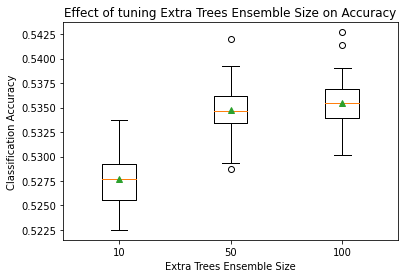

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('Extra Trees Ensemble Size')
plt.ylabel('Classification Accuracy')
plt.title('Effect of tuning Extra Trees Ensemble Size on Accuracy')
plt.show()

In [ ]:
# from numpy import arrange

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 10
	for i in [1, 2, 4, 6]:
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_pca, train_y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.535 (0.003)
>2 0.536 (0.003)
>4 0.536 (0.003)
>6 0.535 (0.003)


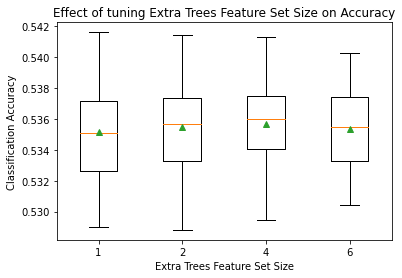

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('Extra Trees Feature Set Size')
plt.ylabel('Classification Accuracy')
plt.title('Effect of tuning Extra Trees Feature Set Size on Accuracy')
plt.show()

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50, max_features=1)
clf.fit(X_train_pca, train_y)

y_pred = clf.predict(X_test_pca)


              precision    recall  f1-score   support

          AU       0.56      0.37      0.44       125
          CA       0.52      0.27      0.35       411
          DE       0.46      0.22      0.30       295
          ES       0.52      0.27      0.35       620
          FR       0.54      0.25      0.35      1430
          GB       0.56      0.26      0.36       642
          IT       0.54      0.26      0.36       778
         NDF       0.73      0.86      0.79     34772
          NL       0.59      0.21      0.31       226
          PT       0.64      0.26      0.37        68
          US       0.60      0.52      0.55     17379
       other       0.58      0.26      0.36      2781

    accuracy                           0.68     59527
   macro avg       0.57      0.33      0.41     59527
weighted avg       0.67      0.68      0.66     59527



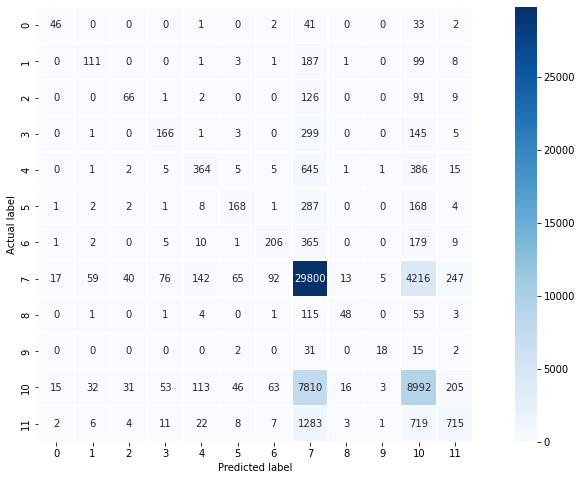

0.6837233524283098
0.6648898382080185


In [ ]:
print(classification_report(test_y, le.inverse_transform(y_pred)))
cm = confusion_matrix(test_y, le.inverse_transform(y_pred))
plt.figure(figsize=(15,8))
sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(test_y, le.inverse_transform(y_pred)))
print(f1_score(test_y, le.inverse_transform(y_pred), average = "weighted"))

In [ ]:
# DECISION TREES ALGORITHM

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import arange
from numpy import mean
from numpy import std


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in [12,15,50,80,100]:
		models[str(i)] = DecisionTreeClassifier(max_depth=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_pca,train_y, scoring='f1_weighted', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


# Predicting the values of test data
# y_pred = dtree.predict(X_test_pca)

>12 0.558 (0.004)
>15 0.554 (0.003)
>50 0.507 (0.003)
>80 0.505 (0.003)
>100 0.505 (0.003)


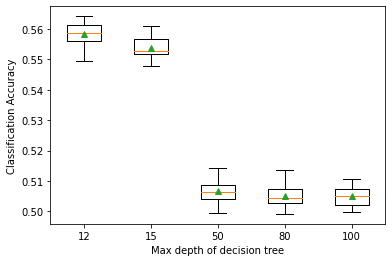

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('Max depth of decision tree')
plt.ylabel('Classification Accuracy')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['gini', 'entropy']
max_depth = [12]
parameters = dict(    criterion=criterion,
                      max_depth=max_depth)

tree = DecisionTreeClassifier()

model_GS = GridSearchCV(tree, parameters, scoring="f1_weighted")
model_GS.fit(X_train_pca, train_y)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [12]},
             scoring='f1_weighted')

In [ ]:
model_GS.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [ ]:
y_pred = model_GS.predict(X_test_pca)

In [ ]:
print(classification_report(test_y, le.inverse_transform(y_pred)))
cm = confusion_matrix(test_y, le.inverse_transform(y_pred))
plt.figure(figsize=(10,10))
sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(test_y, le.inverse_transform(y_pred)))
print(f1_score(test_y, le.inverse_transform(y_pred), average = "weighted"))

In [ ]:
# XG BOOST

from xgboost import XGBClassifier


#  get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100]
	for n in trees:
		models[str(n)] = XGBClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  print(cv)
  scores = cross_val_score(model, X_train_pca,train_y, scoring='f1_weighted', cv=cv, n_jobs=-1)
  return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

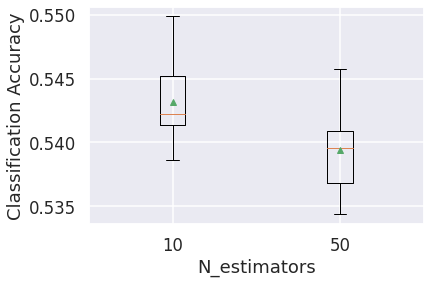

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('N_estimators')
plt.ylabel('Classification Accuracy')
plt.show()

In [ ]:
model = XGBClassifier()
learning_rate = [0.01, 0.1, 0.3, 0.5]

grid = dict(learning_rate=learning_rate, n_estimators=[10])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_pca,train_y )
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.545263 using {'learning_rate': 0.01, 'n_estimators': 10}
0.545263 (0.003529) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.543192 (0.003081) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.537902 (0.003210) with: {'learning_rate': 0.3, 'n_estimators': 10}
0.545226 (0.003224) with: {'learning_rate': 0.5, 'n_estimators': 10}


In [ ]:
model.get_params()

In [ ]:
# Predicting the values of test data
y_pred = model.predict(X_test_pca)

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       145
          CA       0.00      0.00      0.00       386
          DE       0.00      0.00      0.00       316
          ES       0.00      0.00      0.00       595
          FR       0.00      0.00      0.00      1442
          GB       0.00      0.00      0.00       670
          IT       0.00      0.00      0.00       777
         NDF       0.64      0.87      0.74     34461
          NL       0.00      0.00      0.00       220
          PT       0.00      0.00      0.00        63
          US       0.46      0.33      0.38     17292
       other       0.00      0.00      0.00      2727

    accuracy                           0.60     59094
   macro avg       0.09      0.10      0.09     59094
weighted avg       0.51      0.60      0.54     59094



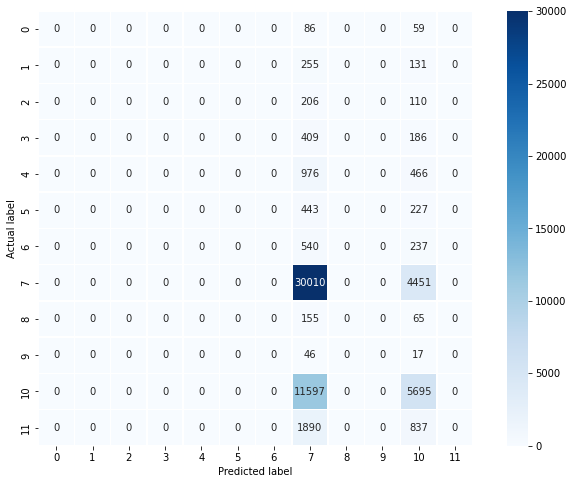

0.6042068568721021


In [ ]:
print(classification_report(test_y, le.inverse_transform(y_pred)))
cm = confusion_matrix(test_y, le.inverse_transform(y_pred))
plt.figure(figsize=(12,8))
sn.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(test_y, le.inverse_transform(y_pred)))